In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from xgboost import XGBRegressor
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [7]:
lafd_dummies = pd.read_csv('./data/lafd_dummies.csv', index_col=0)
print(lafd_dummies.shape)

(1245115, 107)


In [9]:
lafd_dummies.head()

,first_in_district,total_pop,call_process_time,turnout_time,response_time,year,white_perc,black_perc,ameri_es_perc,asian_perc,...,quarter_3,quarter_4,regions_downtown,regions_east_side,regions_harbor,regions_hollywood,regions_north_east,regions_sf_valley,regions_south_central,regions_west_side
1747427,103,32525.30,41,67,383,2016,34.738773,5.923912,0.016664,12.445881,...,0,0,0,0,0,0,0,1,0,0
1747428,103,32525.30,41,66,391,2016,34.738773,5.923912,0.016664,12.445881,...,0,0,0,0,0,0,0,1,0,0
1747429,7,34932.84,40,48,407,2016,8.252034,1.172736,0.193629,11.626052,...,0,0,0,0,0,0,0,1,0,0
1747430,7,34932.84,40,84,461,2016,8.252034,1.172736,0.193629,11.626052,...,0,0,0,0,0,0,0,1,0,0
1747431,26,52784.01,101,107,272,2016,5.631099,26.304008,0.056911,7.036260,...,0,0,0,0,0,0,0,0,1,0


In [11]:
lafd_dummies['logy'] = lafd_dummies['response_time'].apply(np.log)


X = lafd_dummies.drop(columns=['response_time', 'logy'])
y = lafd_dummies['logy']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state= 42, 
                                                    test_size = 0.3);


ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/jameslee/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jameslee/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/jameslee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [69]:

xg = XGBRegressor()
xg.fit(X_train_sc, y_train)

y_pred = xg.predict(X_test_sc)


print(xg.score(X_train_sc, y_train))
print(xg.score(X_test_sc, y_test))

/Users/jameslee/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.18798496719948987
0.18647861594707427


In [71]:
RMSE = round(mean_squared_error(y_test , y_pred)**0.5, 3)
print(f'RMSE for XGBRegressor: {RMSE}')

RMSE for XGBRegressor: 0.434


In [13]:
xgboost = XGBRegressor(random_state=42, n_jobs=-1)
xg_params = {
             'learning_rate': [0.05,0.1],
             'max_depth': [7,8],
             'n_estimators': [100]
}


gs = GridSearchCV(xgboost, param_grid= xg_params, cv=3)

gs.fit(X_train_sc, y_train)
print(gs.best_score_)
gs.best_params_

/Users/jameslee/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/jameslee/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/jameslee/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/jameslee/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/jameslee/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(dat

0.22634483822527096


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

In [14]:
xg = XGBRegressor(max_depth=10, learning_rate= 0.1, n_estimators=100)
xg.fit(X_train_sc, y_train)

y_pred = xg.predict(X_test_sc)


print(xg.score(X_train_sc, y_train))
print(xg.score(X_test_sc, y_test))

/Users/jameslee/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.2673219319016469
0.23038594890460729


Text(0, 0.5, 'Feature')

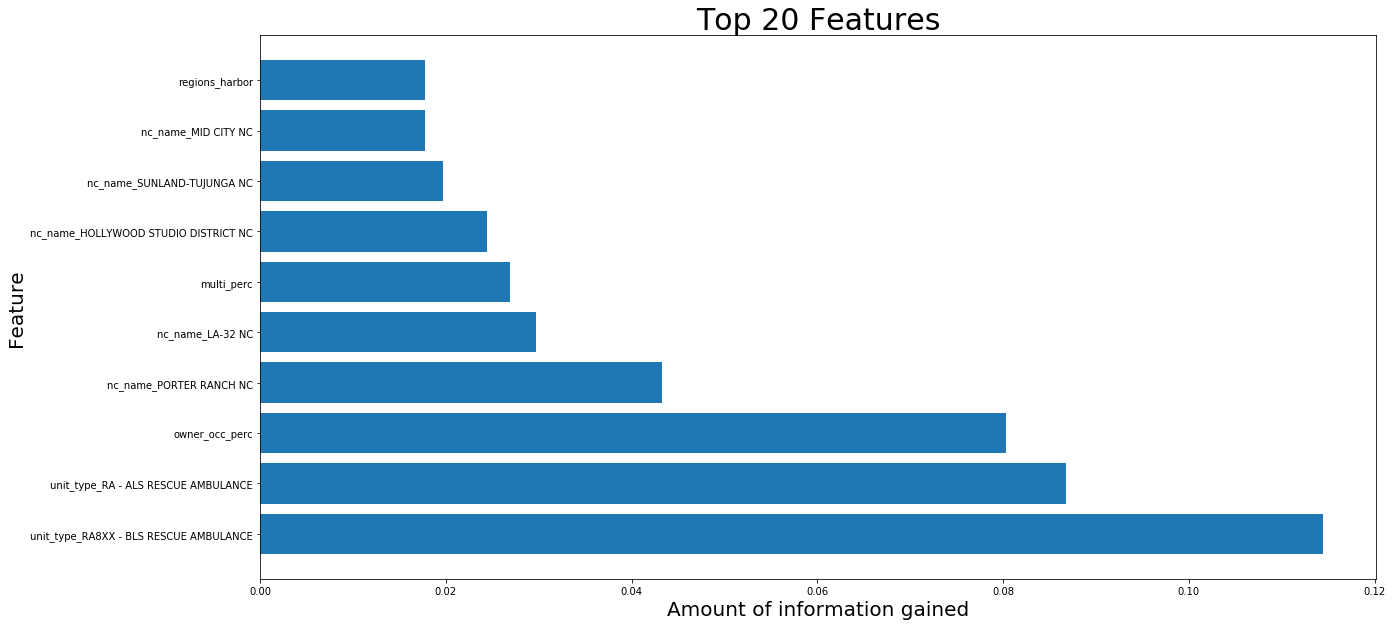

In [15]:
feat_importance = pd.DataFrame(xg.feature_importances_,  
                               X.columns, 
                               columns=['importance'])
plt.figure(figsize=(20,10))
temp = feat_importance.sort_values('importance', ascending=False).head(10)
plt.barh(temp.index, temp['importance'])
plt.title('Top 20 Features', fontsize=30)
plt.xlabel('Amount of information gained', fontsize=20)
plt.ylabel('Feature', fontsize=20)

BLS RESCUE AMBULANCE and ALS RESCUE AMBULANCE are the top 2 most important features according to the XG Boost Model. 
ALS is a rescue ambulance that is staffed with parademics, people with training that allows them to stabilize patients en-route to a hospital.
BLS is a rescue ambulance with two EM technicians instead of paramedics, those individuals cannot use needles, cut skin, or administer medications to patients.

In many cases, BLS ambulances will be dispatched only to realize the patient requires an ALS ambulance for medical treatment during transport. This is reflected even in our dataset as more than 85% of the LAFD incident calls are medical emergencies.

Given all these reasons, we recommend the City of LA and the LAFD to increase the number of ALS ambulances instead of increasing the number of BLS ambulances. 

